# Chapter 10 kMeans clustering

聚类是一种无监督式学习的方法，将相似的对象归类到一个簇中。k-means clustering是一种常用的聚类算法，它会将数据划分为k个簇。

## k均值聚类的特点

- 优点：容易实现
- 缺点：可能收敛到局部最小值；在大型数据集上较慢

## k均值聚类的工作流程

1. 随机确定k个起始点作为质心
2. 计算数据中每个点与质心的距离
3. 分配数据点到其距离最小的质心所在的簇

使用示例数据 "testSet.txt" 演示kMeans clustering


In [1]:
import kMeans
from numpy import *
datMat = mat(kMeans.loadDataSet('testSet.txt'))
datMat[0:4,]

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104]])

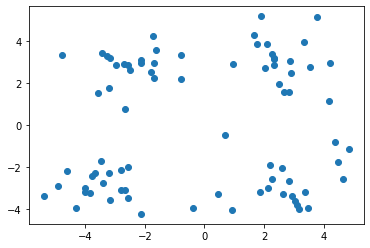

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datMat[:,0].flatten().A[0], datMat[:,1].flatten().A[0])
plt.show()

使用欧氏距离计算点之间的距离 ${\sqrt {\sum (x_i - y_i)^2}}$

```python
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)
```


In [8]:
myCentroids, clustAssing = kMeans.kMeans(dataSet=datMat, k=4)

[[-4.24056301 -3.71259127]
 [-1.58811347 -0.82376201]
 [ 0.63781919 -3.00109075]
 [ 4.64582704 -0.79793511]]
[[-3.65056025 -3.06854812]
 [-2.256007    2.09223456]
 [ 2.21573353 -3.24189747]
 [ 3.05350329  2.07347767]]
[[-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 2.56468005 -2.8885874 ]
 [ 2.70967829  2.9214931 ]]
[[-3.53973889 -2.89384326]
 [-2.46154315  2.78737555]
 [ 2.65077367 -2.79019029]
 [ 2.6265299   3.10868015]]


In [9]:
myCentroids

matrix([[-3.53973889, -2.89384326],
        [-2.46154315,  2.78737555],
        [ 2.65077367, -2.79019029],
        [ 2.6265299 ,  3.10868015]])

In [11]:
clustAssing[0:4,]

matrix([[3.        , 2.3201915 ],
        [1.        , 1.39004893],
        [2.        , 7.46974076],
        [0.        , 3.60477283]])

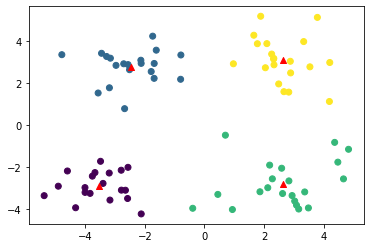

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datMat[:,0].flatten().A[0], datMat[:,1].flatten().A[0], c=clustAssing[:,0].flatten().A[0])
ax.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='^', c='r')
plt.show()

> `flatten()` 转换nxm的矩阵为${1x(n*m)}$的矩阵
> 
> `A` 转换为array

`kMeans` 函数打印了每次迭代过程中，质心的值。第一次打印的是随机选取的质心，随后三次迭代过程中打印的是当前簇的质心。

函数返回最后聚类的质心 `myCentroids` , 以及每个数据点的类别 `clustAssing` ，其中一行对应一个点，第一列是分到的类，第二列是点与质心的距离的平方(也就是分类的误差)。上图绘制了数据点k均值聚类的结果，每一簇用一个颜色代表，质心为红色三角形。

一种用于度量聚类效果的指标为SSE（Sum of Squared Error）.

# 二分k均值（bisecting K-means）

该算法先将所有点当作一个簇，然后进行二分。选择SSE较大的簇进行划分，直到指定的k值。

使用示例数据 "testSet2.txt" 演示

In [15]:
datMat2 = mat(kMeans.loadDataSet('testSet2.txt'))
shape(datMat2)

(60, 2)

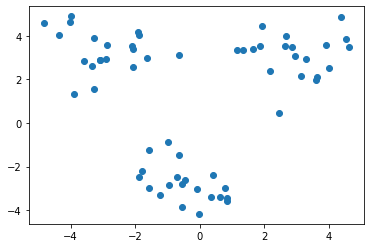

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datMat2[:,0].flatten().A[0], datMat2[:,1].flatten().A[0])
plt.show()

In [18]:
cenList, myNewAssments = kMeans.biKmeans(datMat2, 3)

[[ 0.12647932 -2.18275547]
 [ 1.12101035 -0.42092755]]
[[-0.45965615 -2.7782156 ]
 [-0.00675605  3.22710297]]
sseSplit, and notSplit:  453.0334895807502 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[[-1.46774191 -1.90532129]
 [-0.39316516 -2.40320424]]
[[-1.41084317 -1.873139  ]
 [-0.05200457 -3.16610557]]
[[-1.31198114e+00 -1.96162114e+00]
 [-7.11923077e-04 -3.21792031e+00]]
[[-1.26873575 -2.07139688]
 [ 0.07973025 -3.24942808]]
[[-1.26405367 -2.209896  ]
 [ 0.19848727 -3.24320436]]
[[-1.1836084 -2.2507069]
 [ 0.2642961 -3.3057243]]
[[-1.12616164 -2.30193564]
 [ 0.35496167 -3.36033556]]
sseSplit, and notSplit:  12.753263136887313 423.8762401366249
[[ 3.48821305  2.92792743]
 [-1.96077688  1.1994377 ]]
[[ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit:  77.59224931775066 29.15724944412535
the bestCentToSplit is:  1
the len of bestClustAss is:  40


In [19]:
cenList

matrix([[-0.45965615, -2.7782156 ],
        [ 2.93386365,  3.12782785],
        [-2.94737575,  3.3263781 ]])

In [21]:
myNewAssments[0:4,]

matrix([[1.        , 0.14546105],
        [2.        , 0.68021383],
        [0.        , 1.02184582],
        [1.        , 1.3454876 ]])

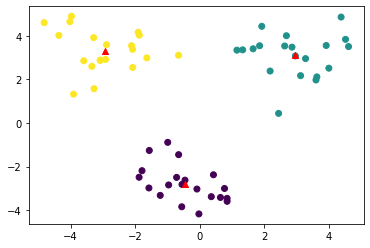

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datMat2[:,0].flatten().A[0], datMat2[:,1].flatten().A[0], c=myNewAssments[:,0].flatten().A[0])
ax.scatter(cenList[:,0].flatten().A[0], cenList[:,1].flatten().A[0], marker='^', c='r')
plt.show()

# 小结

k均值聚类能够无偏地将数据集划分成k个类。

Bisecting K-means是一种自上而下的聚类方法，有些情况会有更好的聚类效果